## Credit Card Fraud Detection

### Business Problem

For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

It has been estimated by Nilson Report that by 2020, banking frauds would account for $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing in new and different ways. 

In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

### Understanding and Defining Fraud

Credit card fraud is any dishonest act or behaviour to obtain information without proper authorisation from the account holder for financial gain. Among different ways of committing frauds, skimming is the most common one, which is a way of duplicating information that is located on the magnetic strip of the card. Apart from this, the other ways are as follows:

- Manipulation/alteration of genuine cards
- Creation of counterfeit cards
- Stealing/loss of credit cards
- Fraudulent telemarketing

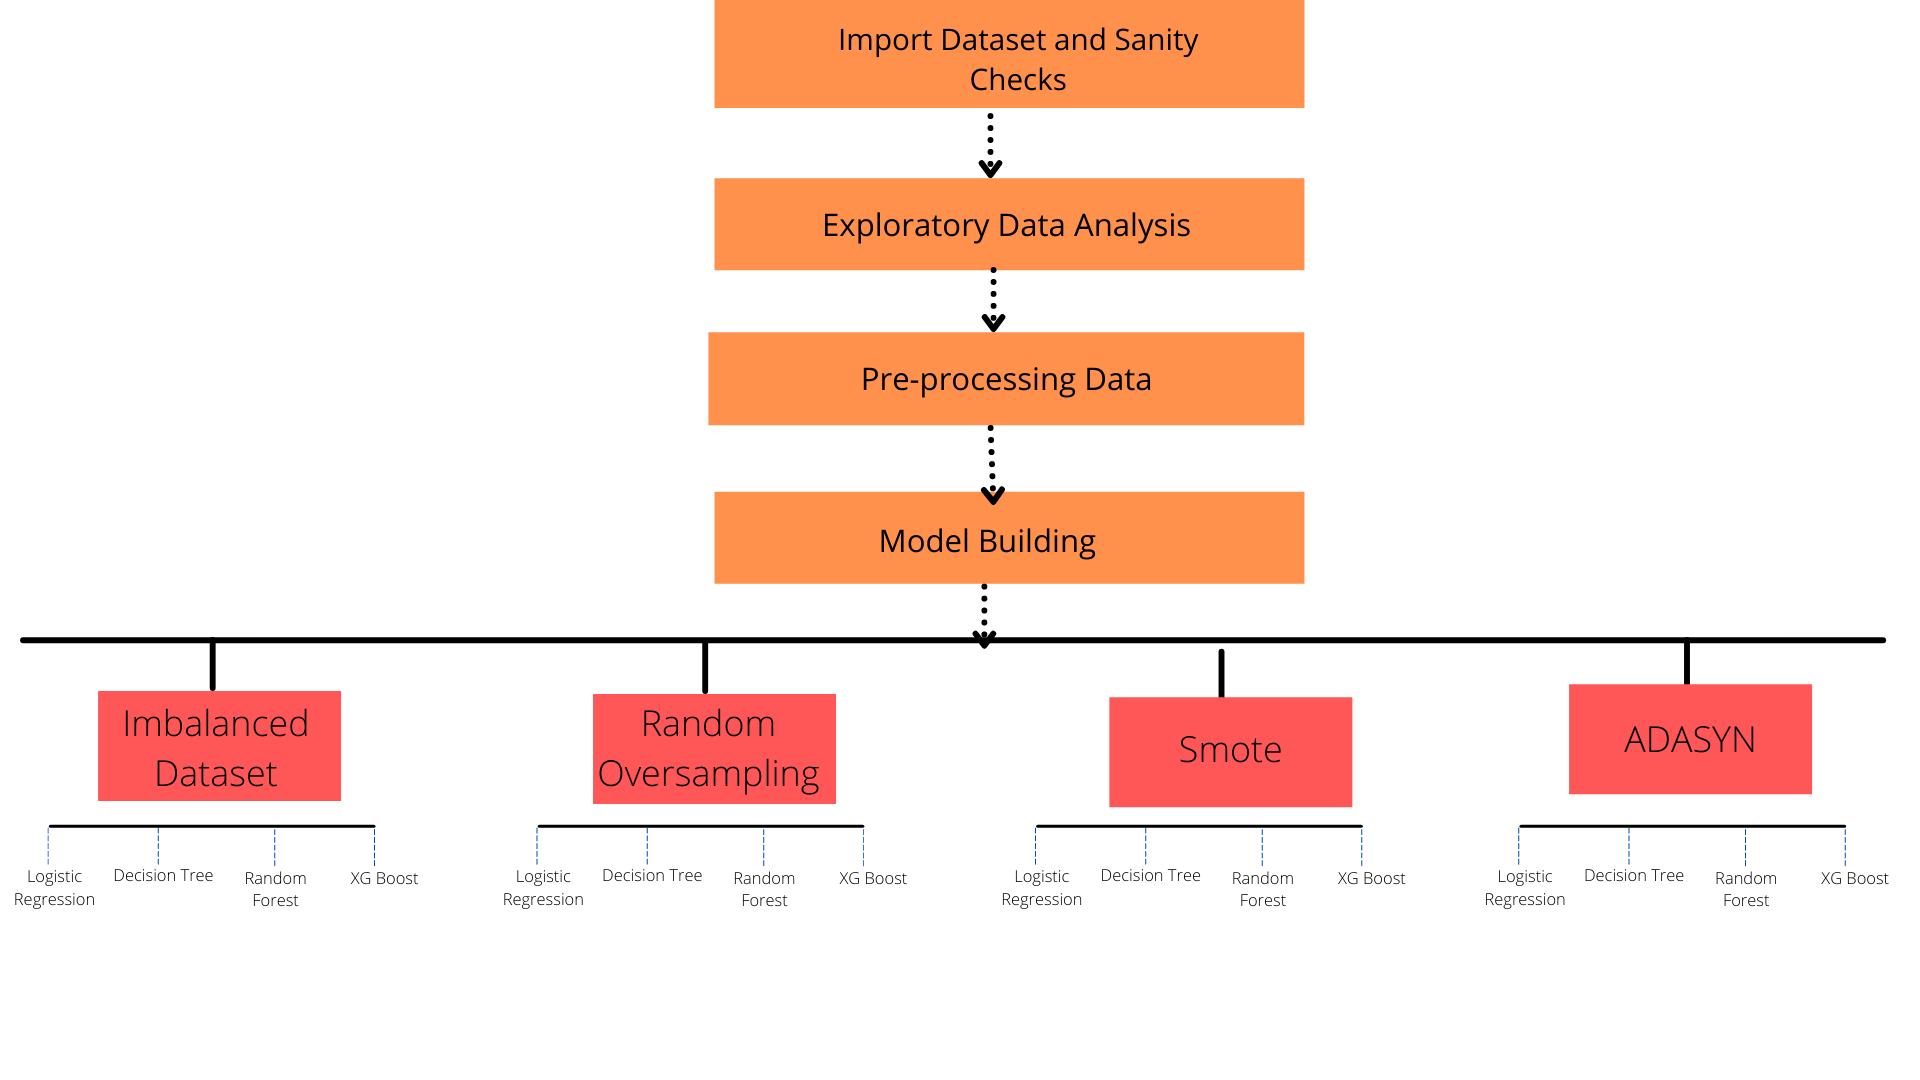

# Importing Data and doing Santiy Checks

In [4]:
# Importing required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

In [5]:
# Making a function to draw roc 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [6]:
# Importing the data

df = pd.read_csv('/Users/nanditapuri/Downloads/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
#observe the different feature type present in the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<b> All the columns have PCA done on them and none of them have any null values. Thus we can process with the exploratory data analysis. <b>

# Exploratory Data Analysis

<b> Here we will observe the distribution of our classes <b>

In [8]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

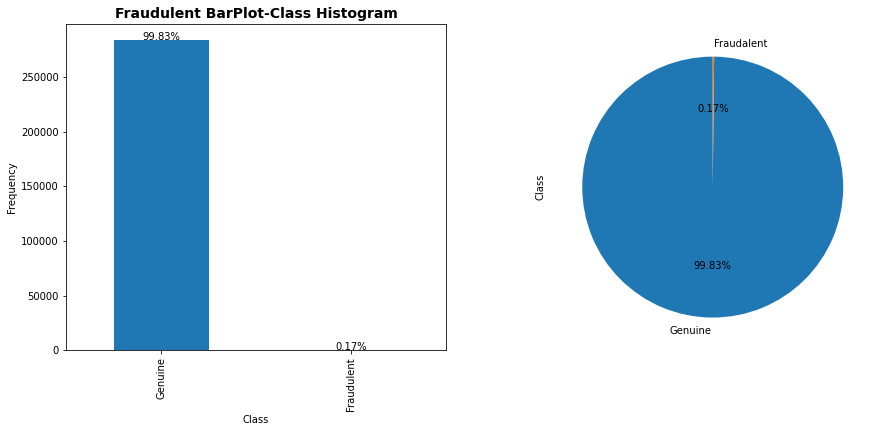

In [9]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.title('Fraudulent BarPlot-Class Histogram', fontweight='bold',fontsize=14)
count_of_classes = pd.value_counts(df['Class'], sort = True).sort_index()
ax = count_of_classes.plot(kind = 'bar')
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks([0,1],["Genuine","Fraudulent"])

total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height*100/total),
            ha="center") 


plt.subplot(122)
labels = 'Genuine', 'Fraudalent'
df["Class"].value_counts().plot.pie(autopct = "%1.2f%%", labels=labels, startangle=90)
plt.show()

<b> As we can see that the data is highly imbalnaced. The genuine cases are are way too high than the fraudenlentcases. But the ticket size of these fraudalent cases are so high that they end up eating the surplus profits. <b>

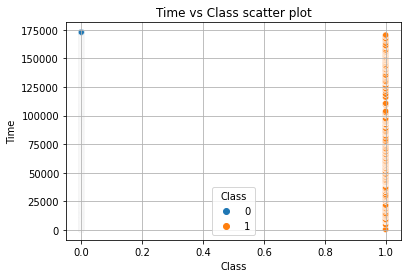

In [10]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot( x = df["Class"],y = df["Time"],hue=df["Class"])
plt.title("Time vs Class scatter plot")
plt.grid()

In [11]:
df_nonfraud = df[df.Class == 0]
df_fraud = df[df.Class == 1]

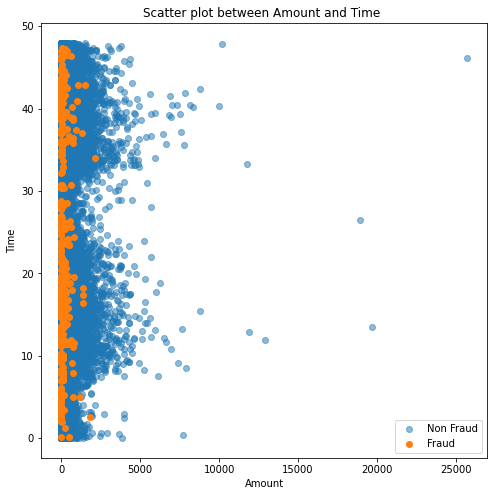

In [12]:
# Create a scatter plot to observe the distribution of classes with Amount

fig = plt.figure(figsize = (8,8))
plt.scatter(df_nonfraud.Amount, df_nonfraud.Time.values/(60*60),alpha=0.5,label='Non Fraud')
plt.scatter(df_fraud.Amount, df_fraud.Time.values/(60*60),alpha=1,label='Fraud')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.title('Scatter plot between Amount and Time ')
plt.legend()
plt.show()

In [13]:
# Drop unnecessary columns
df = df.drop("Time", axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Pre-processing of the data set

In [14]:
# Splitting between X and y 

y= df["Class"]
X = df.drop("Class", axis = 1)
y.shape,X.shape

((284807,), (284807, 29))

In [15]:
# Splitting between train and test 

from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 29), (56962, 29), (227845,), (56962,))

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [16]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### Plotting the distribution of a variable

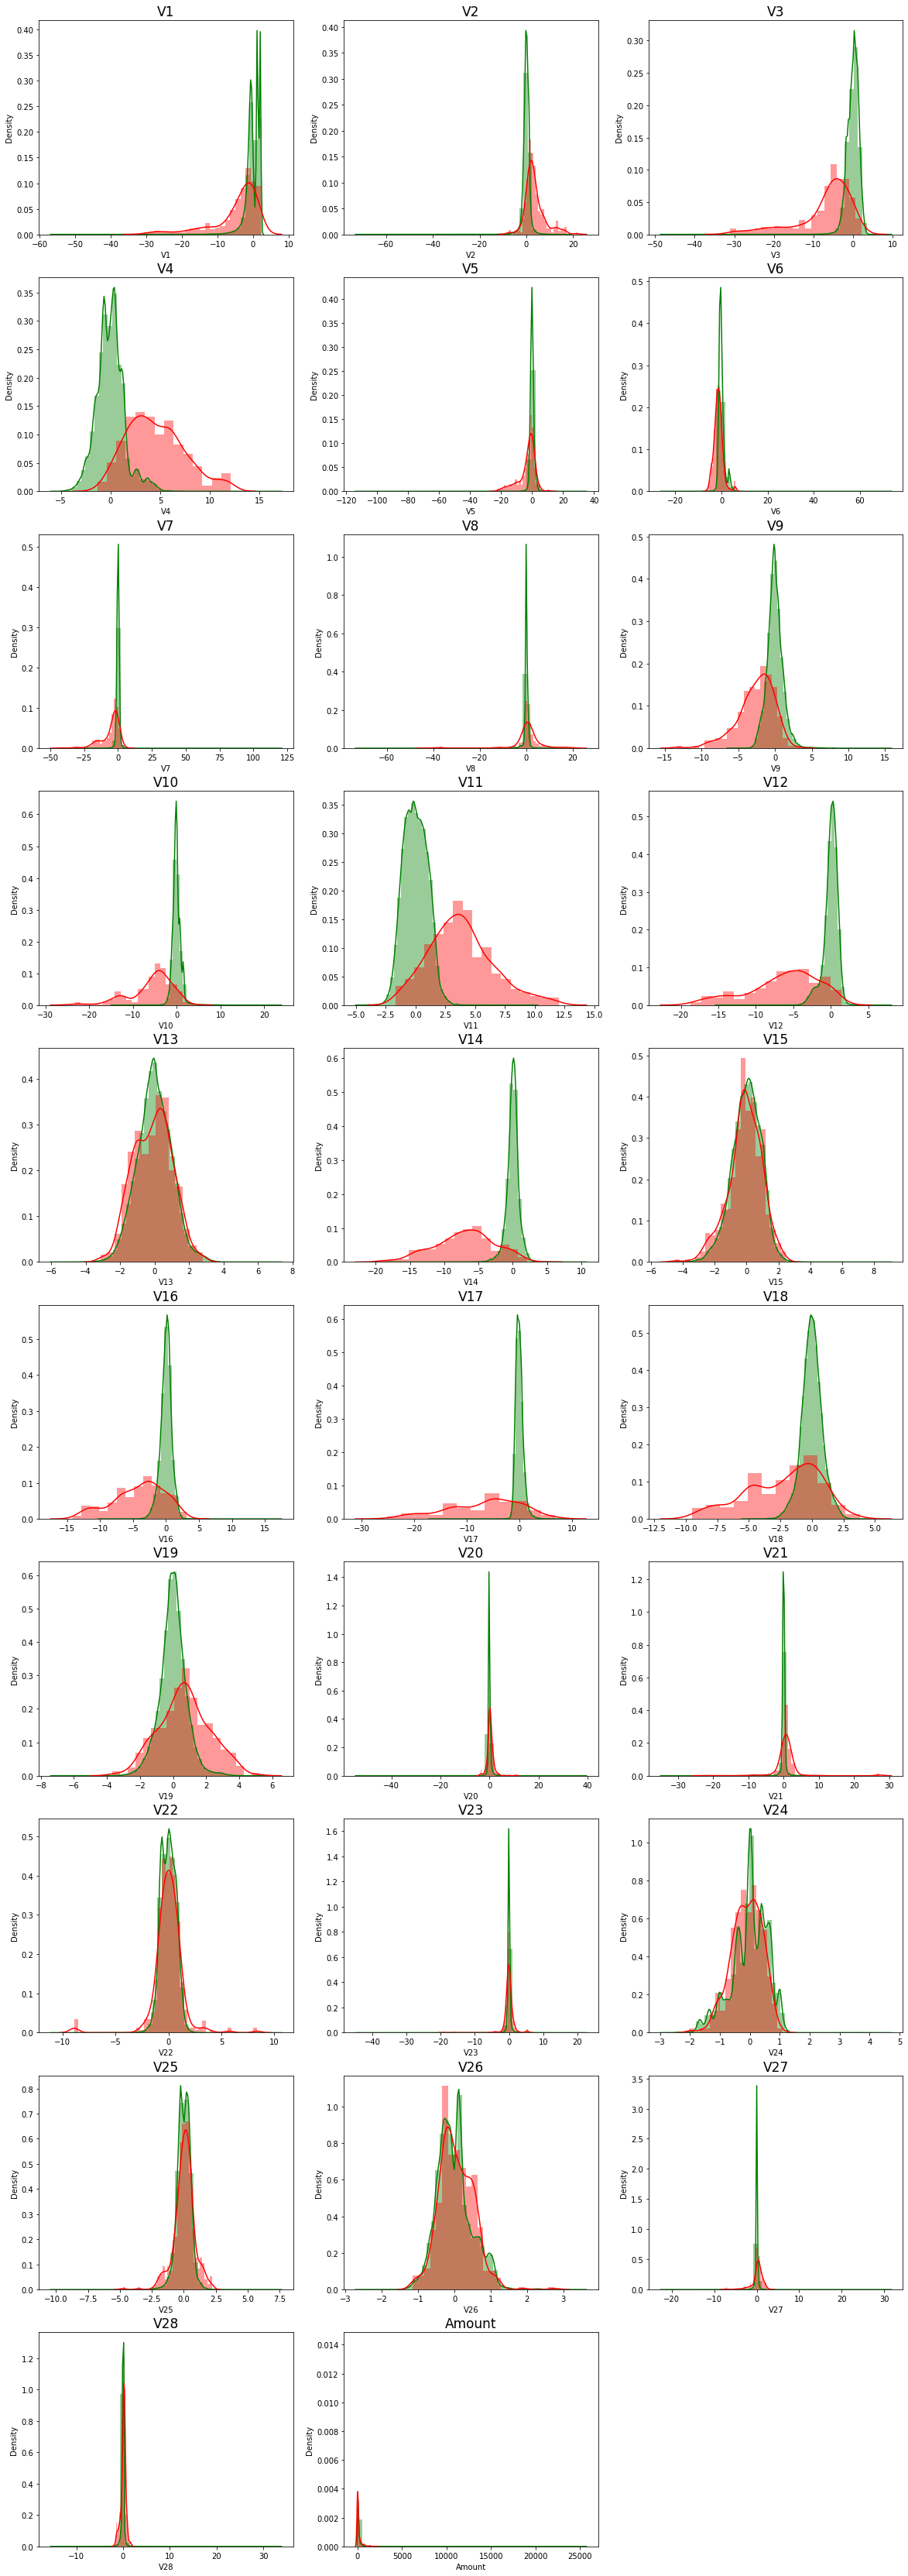

In [17]:
# plot the histogram of a variable from the dataset to see the skewness
cols = list(df.columns.values)
cols.remove('Class')
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(df[col][normal_records], color='green')
    sns.distplot(df[col][fraud_records], color='red')
    plt.title(col, fontsize=17)
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [18]:
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp

,Skewness
Features,
V1,-3.306334
V2,-4.779484
V3,-2.247962
V4,0.687574
V5,-2.786851
V6,1.937381
V7,3.152665
V8,-8.639485
V9,0.541869


In [19]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
skewed.tolist()

['V1',
 'V2',
 'V3',
 'V5',
 'V6',
 'V7',
 'V8',
 'V10',
 'V12',
 'V14',
 'V16',
 'V17',
 'V20',
 'V21',
 'V23',
 'V28',
 'Amount']

In [20]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

# Fitting the power transformer in train data
X_train[skewed] = pt.fit_transform(X_train[skewed])


# Transforming the test data
X_test[skewed] = pt.transform(X_test[skewed])

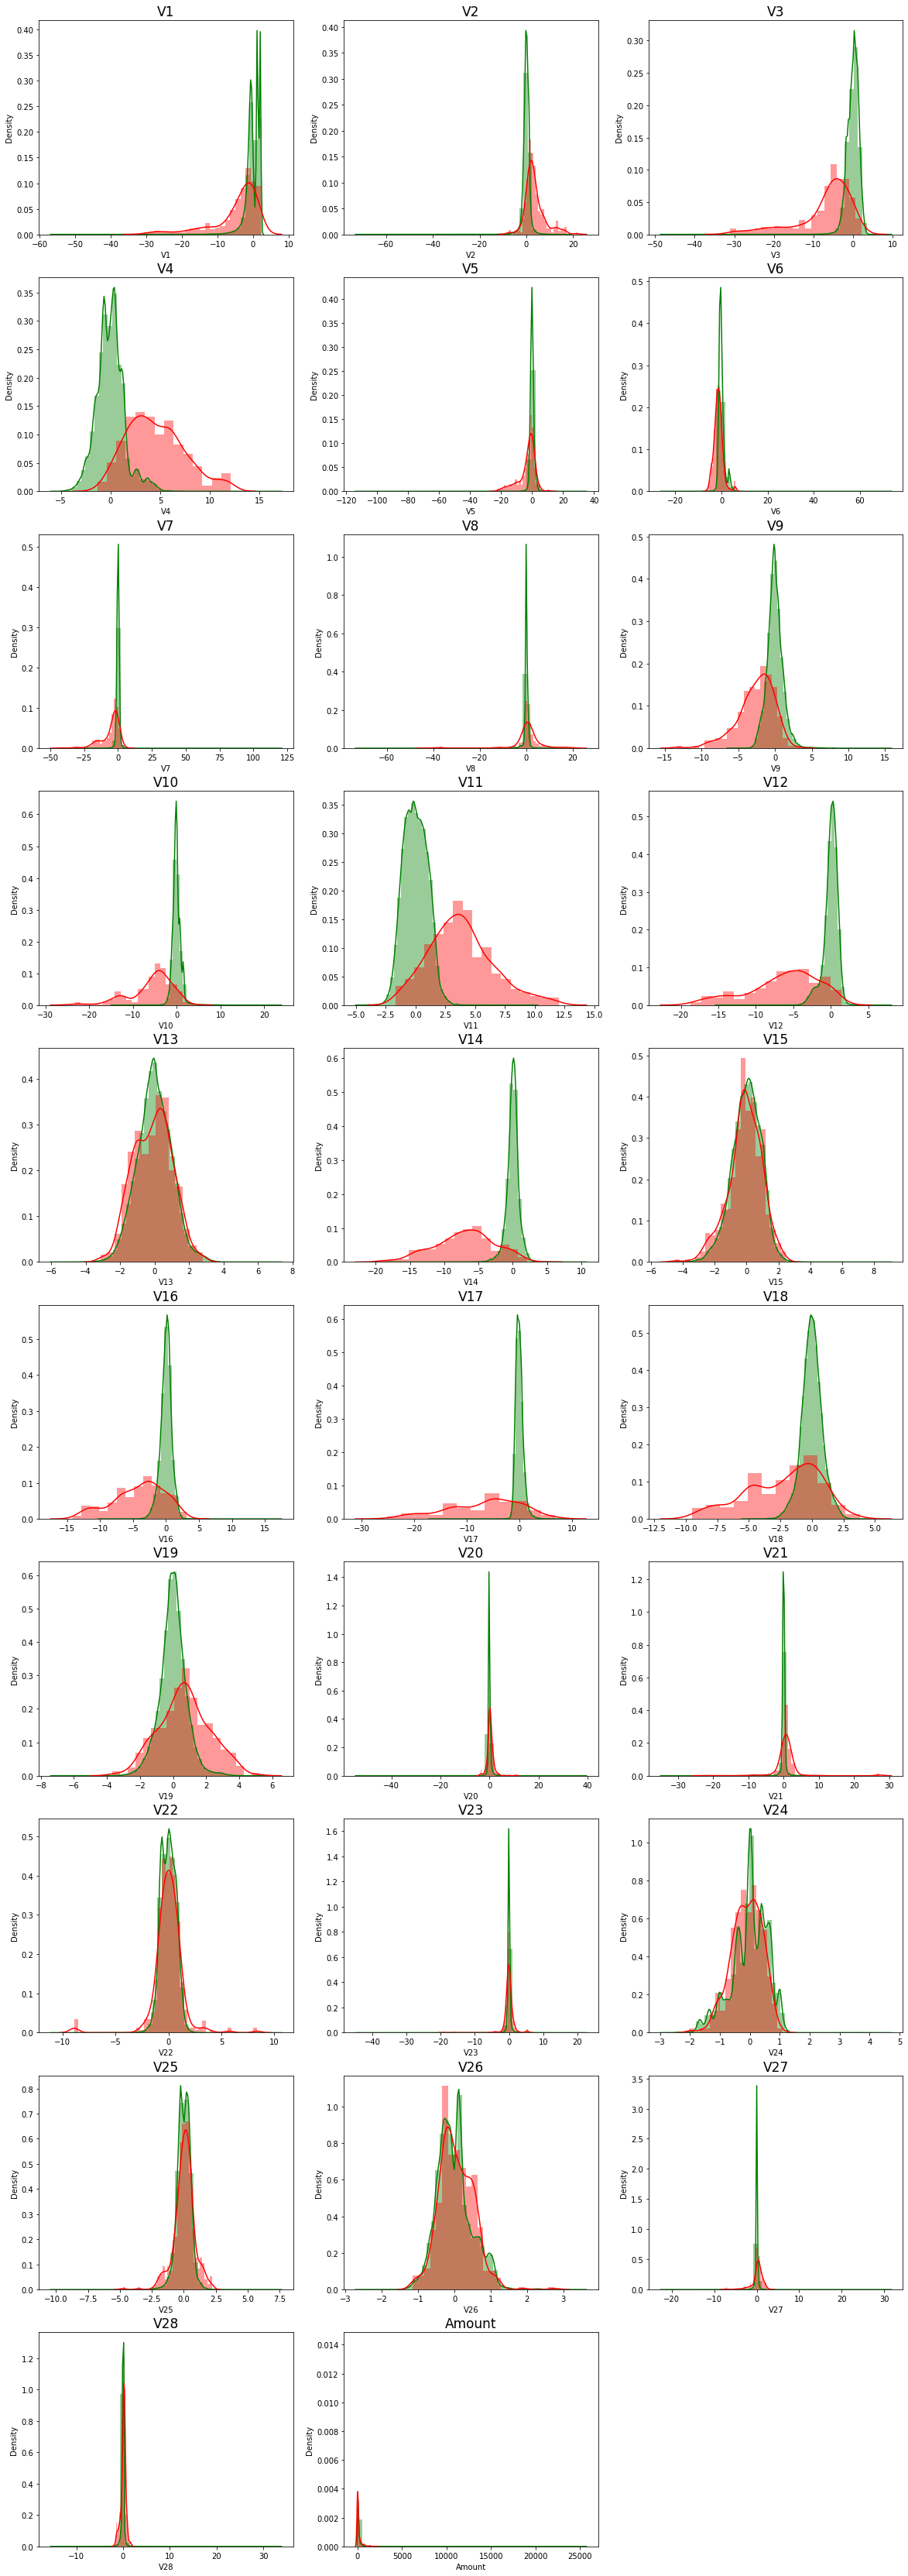

In [21]:
# plot the histogram of a variable from the dataset again to see the result 

cols = list(df.columns.values)
cols.remove('Class')
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(df[col][normal_records], color='green')
    sns.distplot(df[col][fraud_records], color='red')
    plt.title(col, fontsize=17)
plt.show()

# Model Building 
- Build different models on the imbalanced dataset and see the result

## 1. Logistic Regression on imblancaed dataset

In [22]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train) #import the package



LogisticRegression()

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=42)

model_cv_logit = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv_logit.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv_logit.best_score_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9813610735525489


In [24]:
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv_logit.best_params_)

Best hyperparameters:  {'C': 0.01}


In [25]:
cv_results = pd.DataFrame(model_cv_logit.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.938478,0.033454,0.087026,0.030177,0.01,{'C': 0.01},0.972136,0.961759,0.994885,0.992038,...,0.981361,0.012551,1,0.985739,0.990048,0.982295,0.983416,0.983910,0.985082,0.002721
1,2.270666,0.202861,0.037047,0.011162,0.1,{'C': 0.1},0.967764,0.957826,0.995736,0.990702,...,0.978849,0.014155,2,0.984616,0.987972,0.979874,0.981123,0.981809,0.983079,0.002899
2,2.759155,0.076012,0.038936,0.010580,1,{'C': 1},0.965970,0.956476,0.995643,0.990232,...,0.977908,0.014691,3,0.984017,0.987202,0.979040,0.980269,0.981041,0.982314,0.002943
3,2.528543,0.207207,0.037860,0.006697,10,{'C': 10},0.965750,0.956262,0.995627,0.990181,...,0.977782,0.014771,4,0.983935,0.987109,0.978934,0.980156,0.980938,0.982214,0.002951
4,2.347145,0.261432,0.032675,0.004319,100,{'C': 100},0.965722,0.956252,0.995627,0.990179,...,0.977771,0.014778,5,0.983925,0.987098,0.978924,0.980145,0.980926,0.982204,0.002951
5,1.650601,0.184915,0.019012,0.002663,1000,{'C': 1000},0.965721,0.956243,0.995626,0.990178,...,0.977768,0.014780,6,0.983925,0.987098,0.978923,0.980144,0.980925,0.982203,0.002951


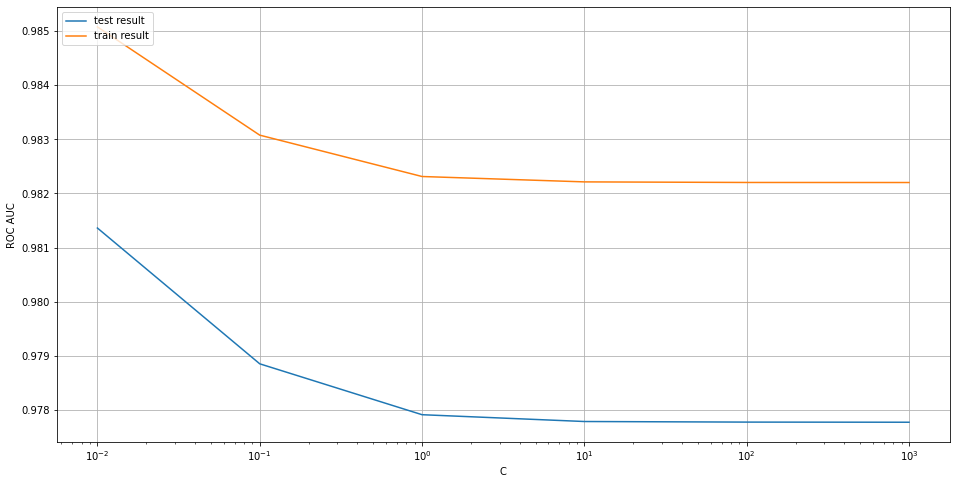

In [26]:
plt.figure(figsize=(16, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('ROC AUC')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')
plt.grid()

In [27]:
# Instantiating the model with best C
log_reg_imb_model = model_cv_logit.best_estimator_

# Fitting the model on train dataset
log_reg_imb_model.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [28]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print("\n\n")
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [29]:
# Predictions on the train set
y_train_pred = log_reg_imb_model.predict(X_train)

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report
y_train_pred = log_reg_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 74.47%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.91      0.63      0.74       394

    accuracy                           1.00    227845
   macro avg       0.96      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [31]:
y_train_pred_proba = log_reg_imb_model.predict_proba(X_train)[:,1]

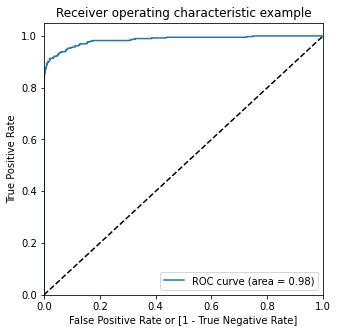

In [32]:
draw_roc(y_train, y_train_pred_proba)

In [33]:
# Making prediction on the test set
y_test_pred = log_reg_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 72.83%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.64      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [34]:
y_test_pred_proba = log_reg_imb_model.predict_proba(X_test)[:,1]
display_scores(y_test, y_test_pred)

F1 Score: 72.83%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.64      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



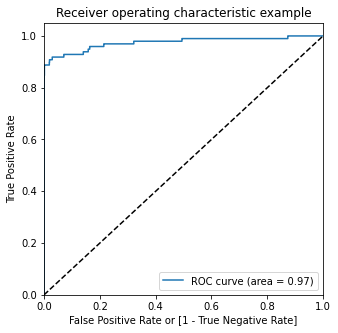

In [35]:
draw_roc(y_test, y_test_pred_proba)

<b>Model Summary<b> 

Train set
- ROC score: 98%
- F1 score: 74.7%

Test set
- ROC score: 97%
- F1 score: 61.23%

## 2. Decision Tree on imblanced Dataset

In [36]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

model_cv_decision_trees = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
model_cv_decision_trees.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [37]:
cv_results = pd.DataFrame(model_cv_decision_trees.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.097266,0.028578,0.021476,0.002563,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.906562,0.960063,0.919089,0.938944,0.934458,0.931823,0.018196,3
1,6.261616,0.186696,0.021208,0.003084,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.906569,0.960063,0.919088,0.938950,0.921813,0.929297,0.018529,4
2,6.506939,0.020519,0.023549,0.001489,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.906370,0.964947,0.925538,0.939587,0.934553,0.934199,0.019100,1
3,6.383049,0.084836,0.023574,0.001800,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.906370,0.964947,0.925538,0.939587,0.934553,0.934199,0.019100,1
4,12.632525,0.109803,0.030089,0.006422,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.880242,0.940438,0.938082,0.951055,0.930941,0.928152,0.024808,5


In [38]:
print("Best roc auc score : ", model_cv_decision_trees.best_score_)

Best roc auc score :  0.9341988405438404


In [39]:
print(model_cv_decision_trees.best_estimator_)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


In [40]:
dt_imb_model = model_cv_decision_trees.best_estimator_

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)

In [41]:
y_train_pred = dt_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 68.32%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.88      0.56      0.68       394

    accuracy                           1.00    227845
   macro avg       0.94      0.78      0.84    227845
weighted avg       1.00      1.00      1.00    227845



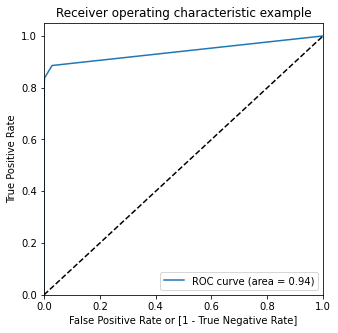

In [42]:
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [43]:
y_test_pred = dt_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 61.73%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.51      0.62        98

    accuracy                           1.00     56962
   macro avg       0.89      0.75      0.81     56962
weighted avg       1.00      1.00      1.00     56962



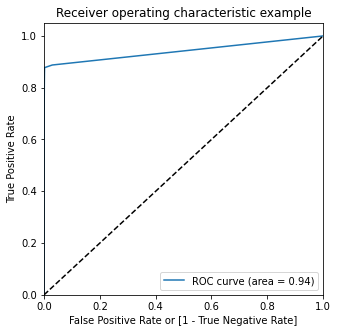

In [44]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

<b>Model Summary<b> 

Train set
- ROC score: 94%
- F1 score:  68.23%

Test set
- ROC score: 94%
- F1 score:  61.73%

## 3. Random Forest on imbalanced dataset

In [45]:
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
rf = RandomForestClassifier()

model_cv_random_forest = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
model_cv_random_forest.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [46]:
cv_results = pd.DataFrame(model_cv_random_forest.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,76.373555,0.116868,0.345819,0.014822,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.947243,0.985002,0.966491,0.964494,0.969868,0.966620,0.012070,8
1,80.184034,4.618199,0.374980,0.079532,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.954465,0.983032,0.963121,0.959802,0.974143,0.966913,0.010315,7
2,86.017402,0.195660,0.535576,0.033017,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.953513,0.985241,0.971470,0.965117,0.979541,0.970977,0.011103,6
3,85.106742,0.644732,0.426259,0.039330,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.957387,0.984474,0.974398,0.960255,0.981298,0.971563,0.010939,5
4,156.487474,0.356516,0.466829,0.031479,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.959024,0.987465,0.983013,0.974473,0.982074,0.977210,0.010007,2


In [47]:
print("Best roc auc score : ", model_cv_random_forest.best_score_)

Best roc auc score :  0.9789151762734528


In [48]:
print(model_cv_random_forest.best_estimator_)

RandomForestClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


In [49]:
rf_imb_model = model_cv_random_forest.best_estimator_

rf_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)

In [50]:
y_train_pred = rf_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 69.43%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.88      0.57      0.69       394

    accuracy                           1.00    227845
   macro avg       0.94      0.79      0.85    227845
weighted avg       1.00      1.00      1.00    227845



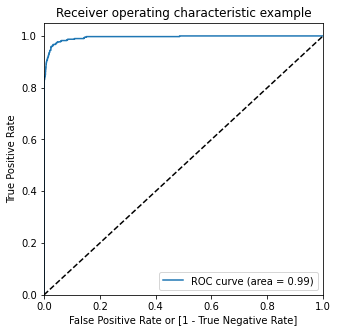

In [51]:
y_train_pred_proba = rf_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [52]:
y_test_pred = rf_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 67.07%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.57      0.67        98

    accuracy                           1.00     56962
   macro avg       0.91      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962



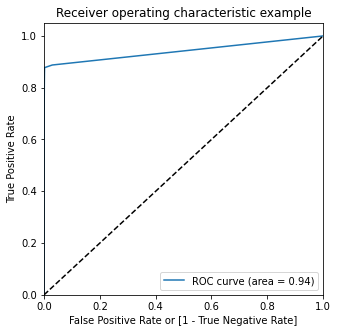

In [53]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## 4. XG Boost on imblanced dataset

In [54]:
from xgboost import XGBClassifier

folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv_XG_boost = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
model_cv_XG_boost.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[11:03:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=No

In [55]:
cv_results = pd.DataFrame(model_cv_XG_boost.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,90.326355,3.668506,0.297973,0.043185,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.973006,0.985788,0.980476,...,0.982046,0.006572,3,0.999820,0.999636,0.999771,0.999698,0.999645,0.999714,0.000071
1,136.900326,5.128017,0.305711,0.054947,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.968617,0.984610,0.988697,...,0.981885,0.008749,4,0.999949,0.999861,0.999762,0.999903,0.999886,0.999872,0.000062
2,172.923025,4.098250,0.248717,0.040527,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.971923,0.986723,0.984657,...,0.982369,0.007717,2,0.999858,0.999842,0.999711,0.999841,0.999727,0.999796,0.000063
3,97.551025,1.971798,0.252210,0.096310,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.971316,0.975223,0.972568,...,0.970868,0.007758,6,0.999991,0.999984,0.999974,0.999930,0.999973,0.999970,0.000021
4,145.472430,3.249332,0.362932,0.044850,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.969175,0.987809,0.976260,...,0.977872,0.007484,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [56]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv_XG_boost.best_score_)

Best roc auc score :  0.9829941090082741


In [57]:
print(model_cv_XG_boost.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [58]:
model_cv_XG_boost.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [59]:
xgb_imb_model = model_cv_XG_boost.best_estimator_
xgb_imb_model.fit(X_train, y_train)

[11:04:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

display_scores(y_train, y_train_pred)

F1 Score: 99.75%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      0.99      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



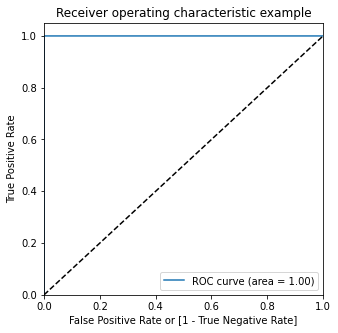

In [61]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

In [62]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 82.87%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.77      0.83        98

    accuracy                           1.00     56962
   macro avg       0.95      0.88      0.91     56962
weighted avg       1.00      1.00      1.00     56962



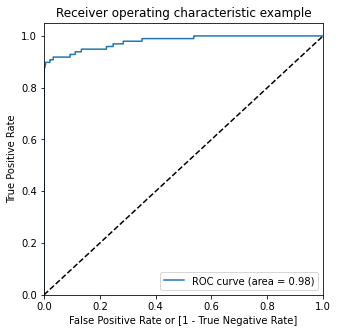

In [63]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 4


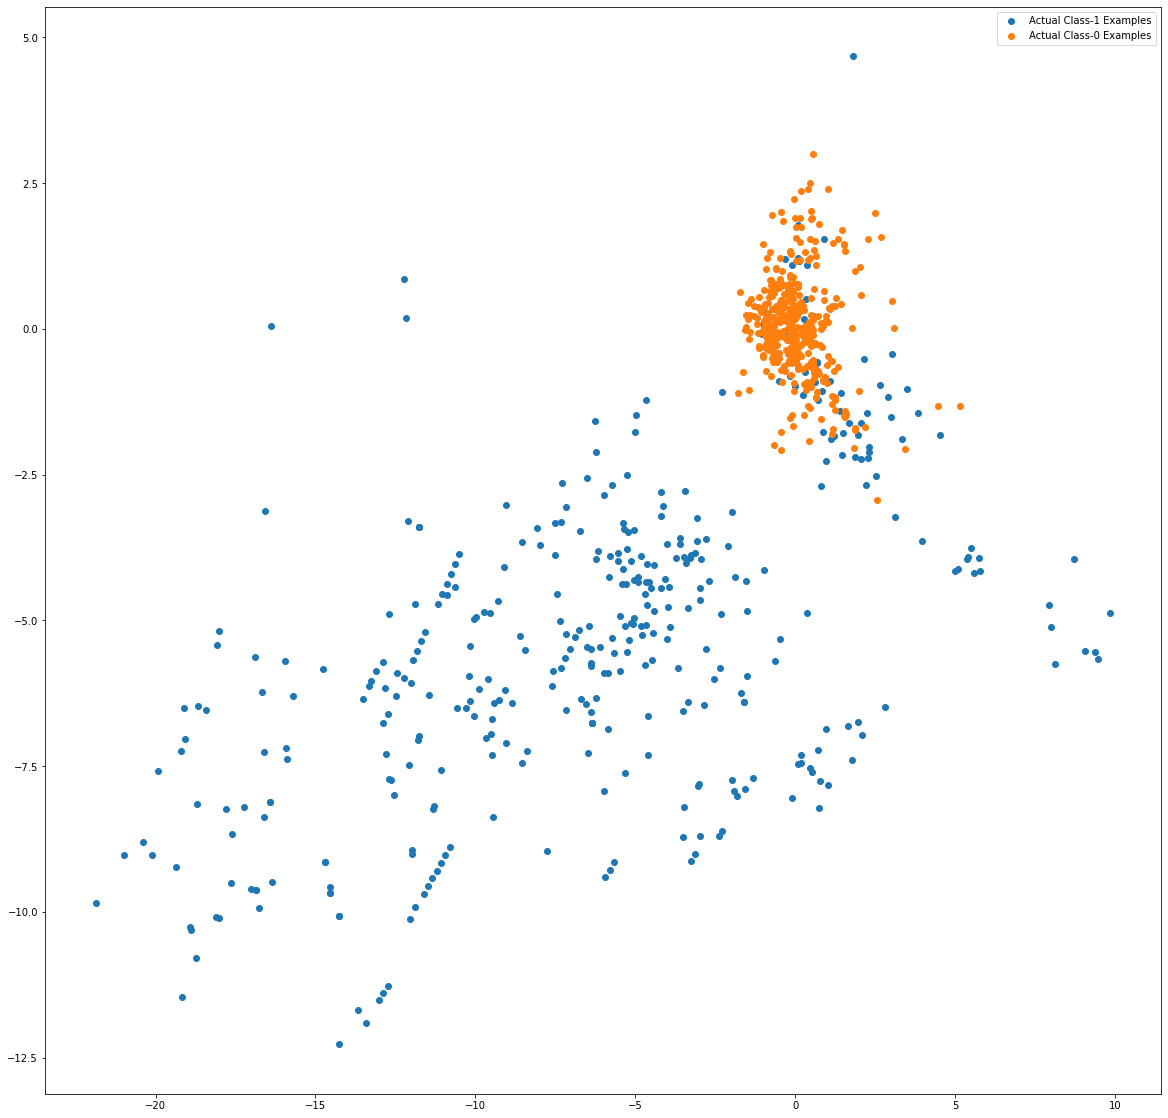

In [64]:
var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [65]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))

Train auc = 1.0


In [66]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Threshold= 0.4601086


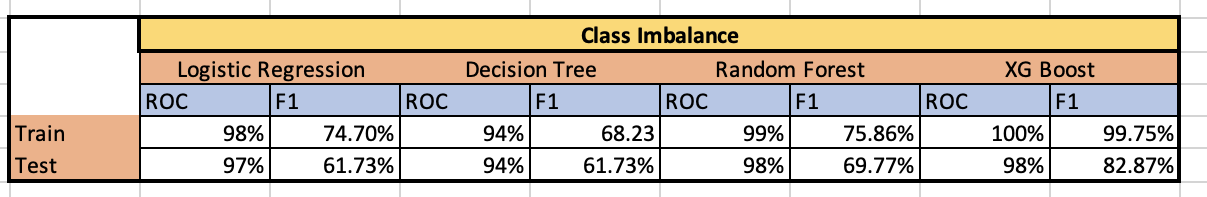

# 2. Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

In [67]:
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
#fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)
X_over.shape, y_over.shape

((454902, 29), (454902,))

##  2.a Logistic Regression on Random Oversampling
- Build different models on the balanced dataset and see the result

In [68]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
cv_num = KFold(n_splits=5, shuffle=True, random_state=42)

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Logistic Regression Cross validation

In [69]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
#perform cross validation
balance_logit = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
balance_logit.fit(X_over, y_over)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', balance_logit.best_score_)

#perform hyperparameter tuning

balance_logit.best_params_


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9886347798671323


{'C': 100}

In [70]:
# cross validation results
cv_results_balance_logit = pd.DataFrame(balance_logit.cv_results_)
cv_results_balance_logit.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.611946,0.101614,0.091673,0.011651,0.01,{'C': 0.01},0.988595,0.988366,0.988450,0.988260,...,0.988499,0.000196,6,0.988503,0.988579,0.988514,0.988575,0.988398,0.988514,0.000066
1,6.076160,1.018602,0.075827,0.016603,0.1,{'C': 0.1},0.988718,0.988493,0.988575,0.988376,...,0.988619,0.000193,5,0.988623,0.988696,0.988630,0.988698,0.988521,0.988634,0.000065
2,5.131768,0.104911,0.079564,0.012382,1,{'C': 1},0.988733,0.988508,0.988590,0.988390,...,0.988633,0.000191,4,0.988637,0.988709,0.988644,0.988712,0.988534,0.988647,0.000065
3,4.826571,0.255789,0.070756,0.014119,10,{'C': 10},0.988734,0.988509,0.988592,0.988391,...,0.988635,0.000192,3,0.988639,0.988710,0.988646,0.988714,0.988536,0.988649,0.000065
4,4.490726,0.572337,0.058553,0.006565,100,{'C': 100},0.988735,0.988510,0.988592,0.988391,...,0.988635,0.000192,1,0.988639,0.988710,0.988646,0.988714,0.988536,0.988649,0.000065


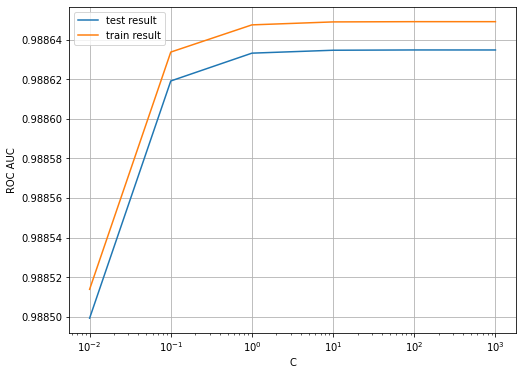

In [71]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results_balance_logit['param_C'], cv_results_balance_logit['mean_test_score'])
plt.plot(cv_results_balance_logit['param_C'], cv_results_balance_logit['mean_train_score'])
plt.xlabel('C')
plt.ylabel('ROC AUC')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')
plt.grid()

#### Logisitc Regression with optimal hyperparameters

In [72]:
# Instantiating the model with best C
log_reg_over_sampling = balance_logit.best_estimator_

# Fitting the model on train dataset
log_reg_over_sampling.fit(X_over, y_over)

LogisticRegression(C=100)

In [73]:
# Predictions on the train set
y_train_pred = log_reg_over_sampling.predict(X_over)

# Printing scores
display_scores(y_over, y_train_pred)

F1 Score: 95.04%



Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    227451
           1       0.97      0.93      0.95    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902



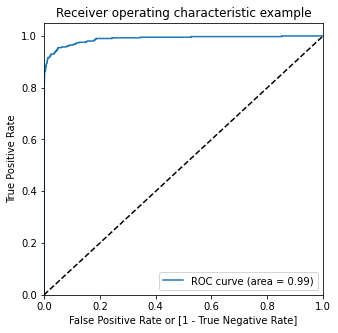

In [74]:
# Predicted probability
y_train_pred_proba = log_reg_over_sampling.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

In [75]:
# Evaluating on test data
y_test_pred = log_reg_over_sampling.predict(X_test)

# Printing the scores
display_scores(y_test, y_test_pred)

F1 Score: 10.34%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962



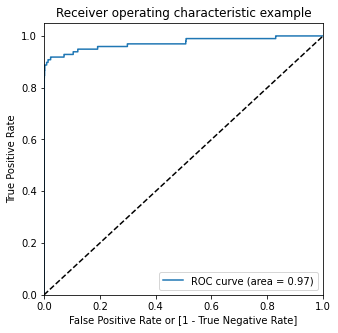

In [76]:
# Predicted probability
y_test_pred_proba = log_reg_over_sampling.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

<b>Model Summary<b> 

Train set
- ROC score: 99%
- F1 score:  94.97%

Test set
- ROC score: 97%
- F1 score:  10.28%

## 2.b Decision Tree on Random Oversampling

In [77]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

balancing_decision_trees = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
balancing_decision_trees.fit(X_over,y_over)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [78]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", balancing_decision_trees.best_score_)

Best roc auc score :  0.9993543806520124


In [79]:
print(balancing_decision_trees.best_estimator_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


In [80]:
# Model with optimal hyperparameters
dt_over_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_over_model.fit(X_over, y_over)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=42)

In [81]:
# Predictions on the train set
y_train_pred = dt_over_model.predict(X_over)
display_scores(y_over, y_train_pred)

F1 Score: 99.59%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    227451
           1       0.99      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



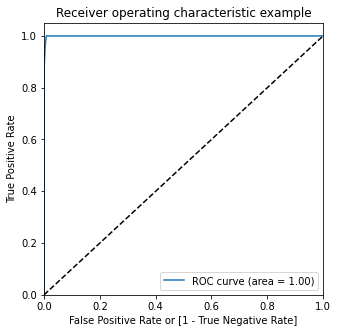

In [82]:
# Predicted probability
y_train_pred_proba = dt_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

In [83]:
# Evaluating model on the test data
y_test_pred = dt_over_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 23.28%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.14      0.83      0.23        98

    accuracy                           0.99     56962
   macro avg       0.57      0.91      0.61     56962
weighted avg       1.00      0.99      0.99     56962



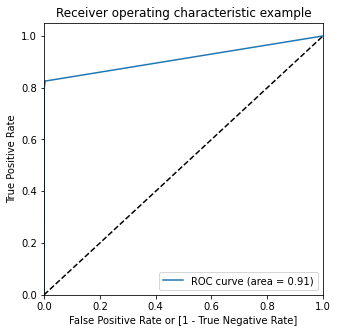

In [84]:
# Predicted probability
y_test_pred_proba = dt_over_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

<b>Model Summary<b> 

Train set
- ROC score: 100%
- F1 score:  99.52%

Test set
- ROC score: 91%
- F1 score:  20.8%

## 2.3 Random Forest on Random Oversampling

In [85]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
rf = RandomForestClassifier()

balancing_oversampling_rf = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
balancing_oversampling_rf.fit(X_over,y_over)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [86]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", balancing_oversampling_rf.best_score_)

Best roc auc score :  0.9999449340253508


In [87]:
# Model with optimal hyperparameters
rf_over_model = balancing_oversampling_rf.best_estimator_

rf_over_model.fit(X_over, y_over)

RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)

In [88]:
# Predictions on the train set
y_train_pred = rf_over_model.predict(X_over)
display_scores(y_over, y_train_pred)

F1 Score: 99.85%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



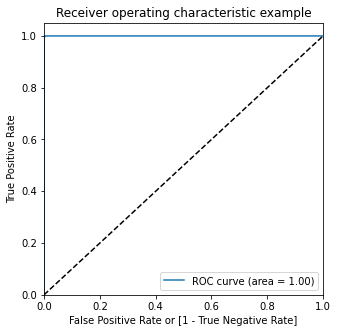

In [89]:
# Predicted probability
y_train_pred_proba = rf_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

In [90]:
# Evaluating model on the test data
y_test_pred = rf_over_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 69.6%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.57      0.89      0.70        98

    accuracy                           1.00     56962
   macro avg       0.79      0.94      0.85     56962
weighted avg       1.00      1.00      1.00     56962



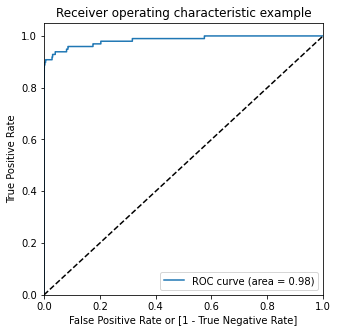

In [91]:
# Predicted probability
y_test_pred_proba = rf_over_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

<b>Model Summary<b> 

Train set
- ROC score: 100%
- F1 score:  99.59%

Test set
- ROC score: 98%
- F1 score:  72.5%

## 2.4 XGB Classifier on Random Oversampling

In [92]:
# creating a KFold object 
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
xgb_over_sampling = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
xgb_over_sampling.fit(X_over, y_over) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[11:40:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=No

In [93]:
print("Best roc auc score : ", xgb_over_sampling.best_score_)

Best roc auc score :  0.9999902081170322


In [94]:
print(xgb_over_sampling.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [95]:
xgb_over_sampling.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [96]:
# fit model on training data
xgb_over_model = xgb_over_sampling.best_estimator_
xgb_over_model.fit(X_over, y_over)

[11:41:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [97]:
# Predictions on the train set
y_train_pred = xgb_over_model.predict(X_over)

display_scores(y_over, y_train_pred)

F1 Score: 99.99%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



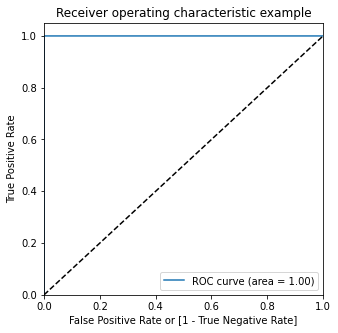

In [98]:
# Predicted probability
y_train_pred_proba = xgb_over_model.predict_proba(X_over)[:,1]

# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

In [99]:
y_pred = xgb_over_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 79.61%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.84      0.80        98

    accuracy                           1.00     56962
   macro avg       0.88      0.92      0.90     56962
weighted avg       1.00      1.00      1.00     56962



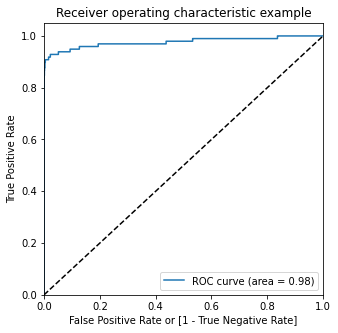

In [100]:
# Predicted probability
y_test_pred_proba = xgb_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

<b>Model Summary<b> 

Train set
- ROC score: 100%
- F1 score:  99.99%

Test set
- ROC score: 97%
- F1 score:  81.6%

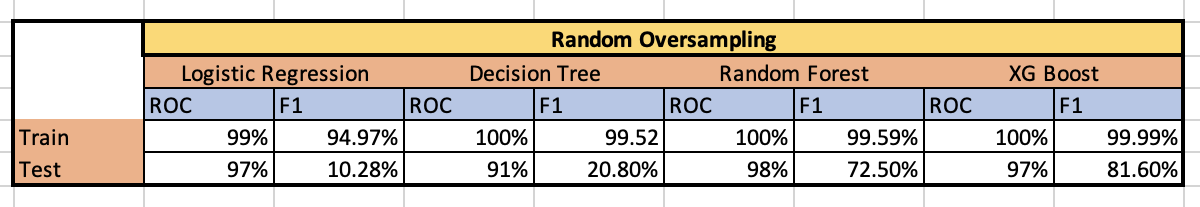

# 3. SMOTE Sampling

### Print the class distribution after applying SMOTE 

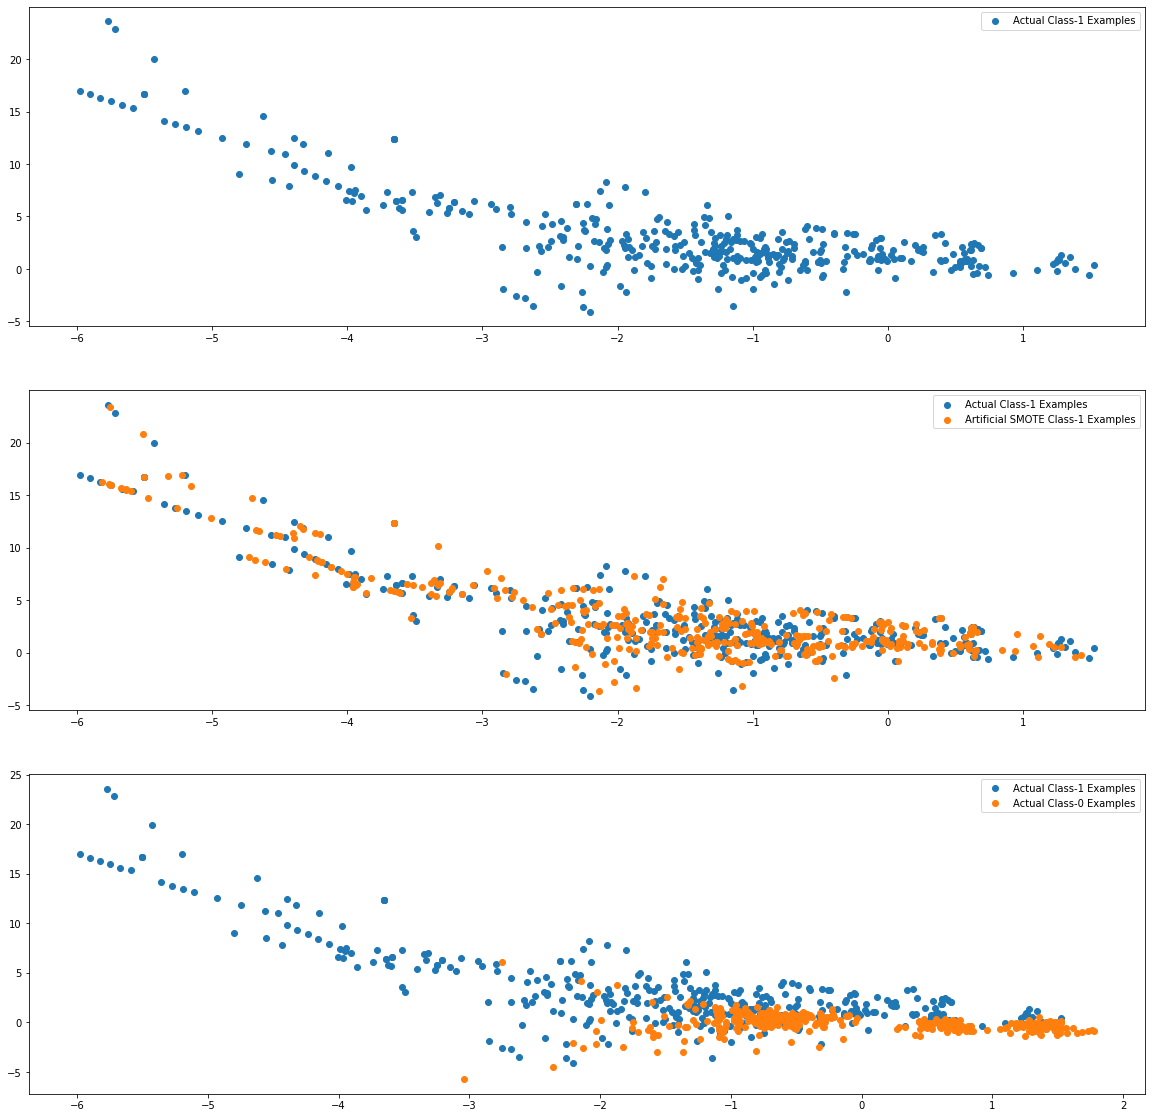

In [101]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

## 3.1 Decision Tree on SMOTE

In [102]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
log_smote_over_sampling = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True) 

# Fit the model
log_smote_over_sampling.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', log_smote_over_sampling.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9908865367975863


In [103]:
print('Best hyperparameters: ', log_smote_over_sampling.best_params_)

Best hyperparameters:  {'C': 1000}


In [104]:
# cross validation results
cv_results = pd.DataFrame(log_smote_over_sampling.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.881171,0.078391,0.122570,0.006129,0.01,{'C': 0.01},0.990779,0.990718,0.990954,0.990516,...,0.990775,0.000155,6,0.990761,0.990795,0.990741,0.990877,0.990753,0.990785,0.000049
1,5.546418,0.628256,0.100002,0.012536,0.1,{'C': 0.1},0.990866,0.990826,0.991046,0.990624,...,0.990875,0.000151,5,0.990862,0.990892,0.990843,0.990977,0.990852,0.990885,0.000049
2,4.905772,0.125193,0.085141,0.005459,1,{'C': 1},0.990875,0.990837,0.991056,0.990636,...,0.990885,0.000150,4,0.990872,0.990902,0.990854,0.990988,0.990862,0.990896,0.000049
3,4.865850,0.127521,0.108888,0.011281,10,{'C': 10},0.990876,0.990838,0.991057,0.990637,...,0.990886,0.000150,3,0.990873,0.990903,0.990855,0.990989,0.990863,0.990897,0.000049
4,4.698824,0.409826,0.084605,0.012105,100,{'C': 100},0.990876,0.990838,0.991057,0.990637,...,0.990887,0.000150,2,0.990874,0.990903,0.990855,0.990989,0.990863,0.990897,0.000049


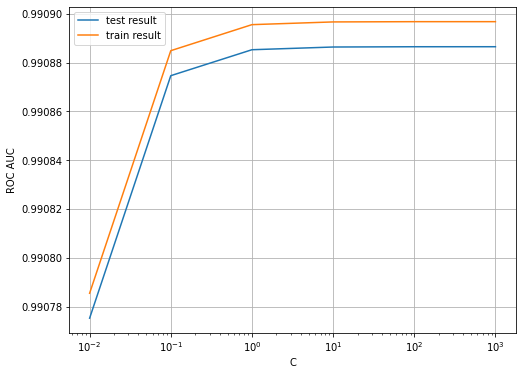

In [105]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('ROC AUC')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')
plt.grid()

In [106]:
# Printing best params
log_smote_over_sampling.best_params_

{'C': 1000}

In [107]:
# Instantiating the model
logreg_smote_model = log_smote_over_sampling.best_estimator_

# Fitting the model with balanced data
logreg_smote_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=1000)

In [108]:
# Evaluating on train data
y_train_pred = logreg_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 94.93%



Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    227451
           1       0.97      0.93      0.95    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902



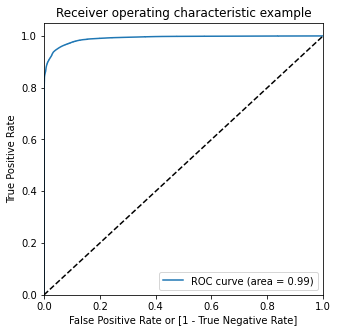

In [109]:
# Predicted probability
y_train_pred_proba_smote = logreg_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_smote)

In [110]:
# Evaluating on test data
y_test_pred = logreg_smote_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 9.64%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



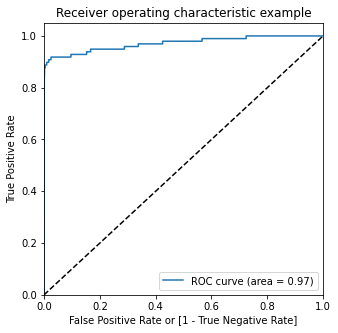

In [111]:
# Predicted probability
y_test_pred_proba_smote = logreg_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_smote)

<b>Model Summary<b> 

Train set
- ROC score: 99%
- F1 score:  94.3%

Test set
- ROC score: 97%
- F1 score:  96.4%

## 3.2 Logistic Regression on SMOTE

In [112]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

logit_smote = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
logit_smote.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [113]:
print("Best roc auc score : ", logit_smote.best_score_)

Best roc auc score :  0.998312568645806


In [114]:
print(logit_smote.best_estimator_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [115]:
logit_smote.best_params_

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}

In [116]:
# Model with optimal hyperparameters
dt_smote_model = logit_smote.best_estimator_

dt_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)

In [117]:
# Predictions on the train set
y_train_pred_smote = dt_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred_smote)

F1 Score: 98.81%



Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



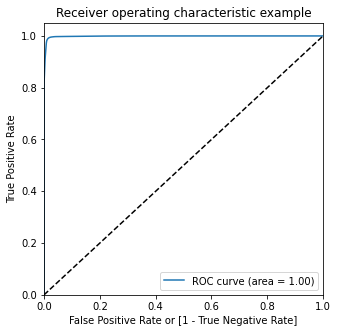

In [118]:
# Predicted probability
y_train_pred_proba = dt_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [119]:
# Evaluating model on the test data
y_pred = dt_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 15.36%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.88      0.15        98

    accuracy                           0.98     56962
   macro avg       0.54      0.93      0.57     56962
weighted avg       1.00      0.98      0.99     56962



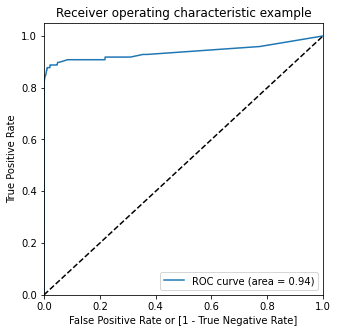

In [120]:
# Predicted probability
y_test_pred_smote = dt_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_smote)

<b>Model Summary<b> 

Train set
- ROC score: 100%
- F1 score:  98.81%

Test set
- ROC score: 93%
- F1 score:  15.36%

## 3.3 Random Forest using SMOTE

In [121]:
#Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


#Instantiate the grid search model
model = RandomForestClassifier()

rf_smote = GridSearchCV(estimator = model, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

#Fit the grid search to the data
rf_smote.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [122]:
#Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", rf_smote.best_score_)

Best roc auc score :  0.9995781173783171


In [123]:
print(rf_smote.best_estimator_)

RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [124]:
rf_smote.best_params_

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}

In [125]:
# Model with optimal hyperparameters
rf_smote_model = rf_smote.best_estimator_

rf_smote_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)

In [126]:
# Predictions on the train set
y_train_pred_smote = rf_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred_smote)

F1 Score: 99.02%



Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    227451
           1       1.00      0.98      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



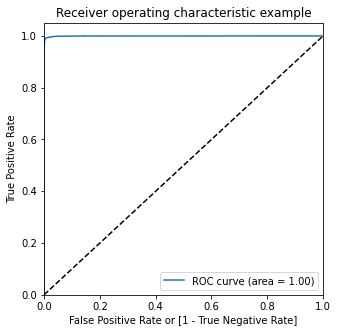

In [127]:
# Predicted probability
y_train_pred_proba = rf_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [128]:
# Evaluating model on the test data
y_pred = rf_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 54.66%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.39      0.90      0.55        98

    accuracy                           1.00     56962
   macro avg       0.70      0.95      0.77     56962
weighted avg       1.00      1.00      1.00     56962



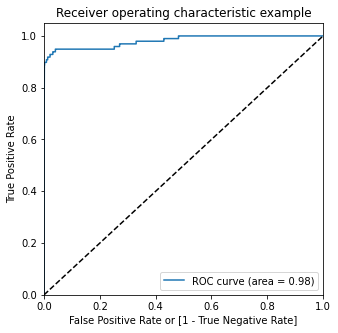

In [129]:
# Predicted probability
y_test_pred_smote = rf_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_smote)

<b>Model Summary<b> 

Train set
- ROC score: 100%
- F1 score:  98.65%

Test set
- ROC score: 94%
- F1 score:  13.37%

## 3.4 XG Boost with Smote

In [130]:
# creating a KFold object 
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
xgb_smote = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
xgb_smote.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[12:40:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=No

In [131]:
# cv results
cv_results = pd.DataFrame(xgb_smote.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,218.817993,0.378420,0.839381,0.086507,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999591,0.999626,0.999575,...,0.999619,0.000032,4,0.999615,0.999662,0.999650,0.999664,0.999653,0.999649,0.000018
1,322.985812,10.281427,0.855479,0.124191,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999636,0.999590,0.999601,...,0.999611,0.000023,5,0.999672,0.999631,0.999683,0.999633,0.999619,0.999648,0.000025
2,428.064057,4.692126,1.040743,0.109888,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999598,0.999559,0.999577,...,0.999592,0.000025,6,0.999635,0.999609,0.999654,0.999636,0.999635,0.999634,0.000015
3,242.372116,4.348724,0.778427,0.078389,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999952,0.999933,0.999923,...,0.999936,0.000009,3,0.999953,0.999959,0.999963,0.999960,0.999960,0.999959,0.000003
4,350.933544,7.419146,0.949613,0.289811,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999959,0.999945,0.999928,...,0.999947,0.000011,1,0.999969,0.999968,0.999971,0.999971,0.999972,0.999970,0.000001
5,346.836171,56.087155,0.369614,0.169455,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999963,0.999943,0.999928,...,0.999940,0.000013,2,0.999969,0.999970,0.999970,0.999971,0.999965,0.999969,0.000002


In [132]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", xgb_smote.best_score_)

Best roc auc score :  0.9999471151571562


In [133]:
print(xgb_smote.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [134]:
xgb_smote.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [135]:
# fit model on training data
xgb_smote_model = xgb_smote.best_estimator_
xgb_smote_model.fit(X_train_smote, y_train_smote)

[12:41:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [136]:
y_train_pred = xgb_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 99.9%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



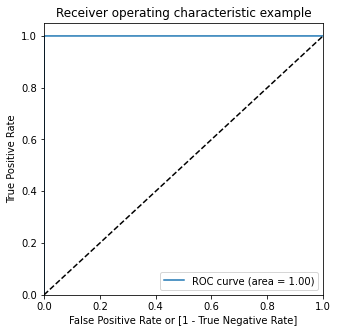

In [137]:
# Predicted probability
y_train_pred_proba_xgb = xgb_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_xgb)

In [138]:
y_pred = xgb_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 50.74%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.36      0.88      0.51        98

    accuracy                           1.00     56962
   macro avg       0.68      0.94      0.75     56962
weighted avg       1.00      1.00      1.00     56962



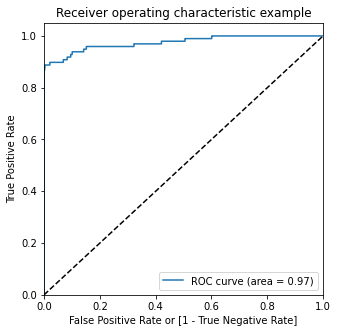

In [139]:
# Predicted probability
y_test_pred_proba = xgb_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

<b>Model Summary<b> 

Train set
- ROC score: 100%
- F1 score:  99.99%

Test set
- ROC score: 97%
- F1 score:  50.74%

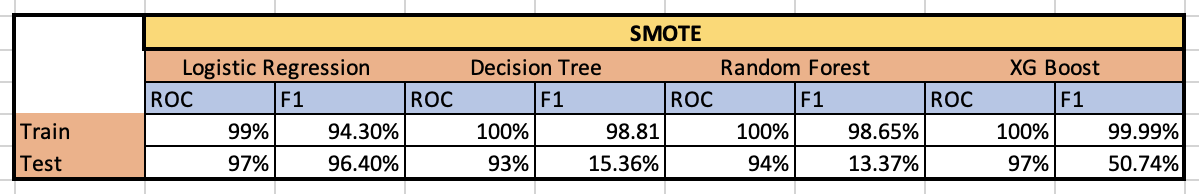

# 4.  ADASYN

### Print the class distribution after applying ADASYN

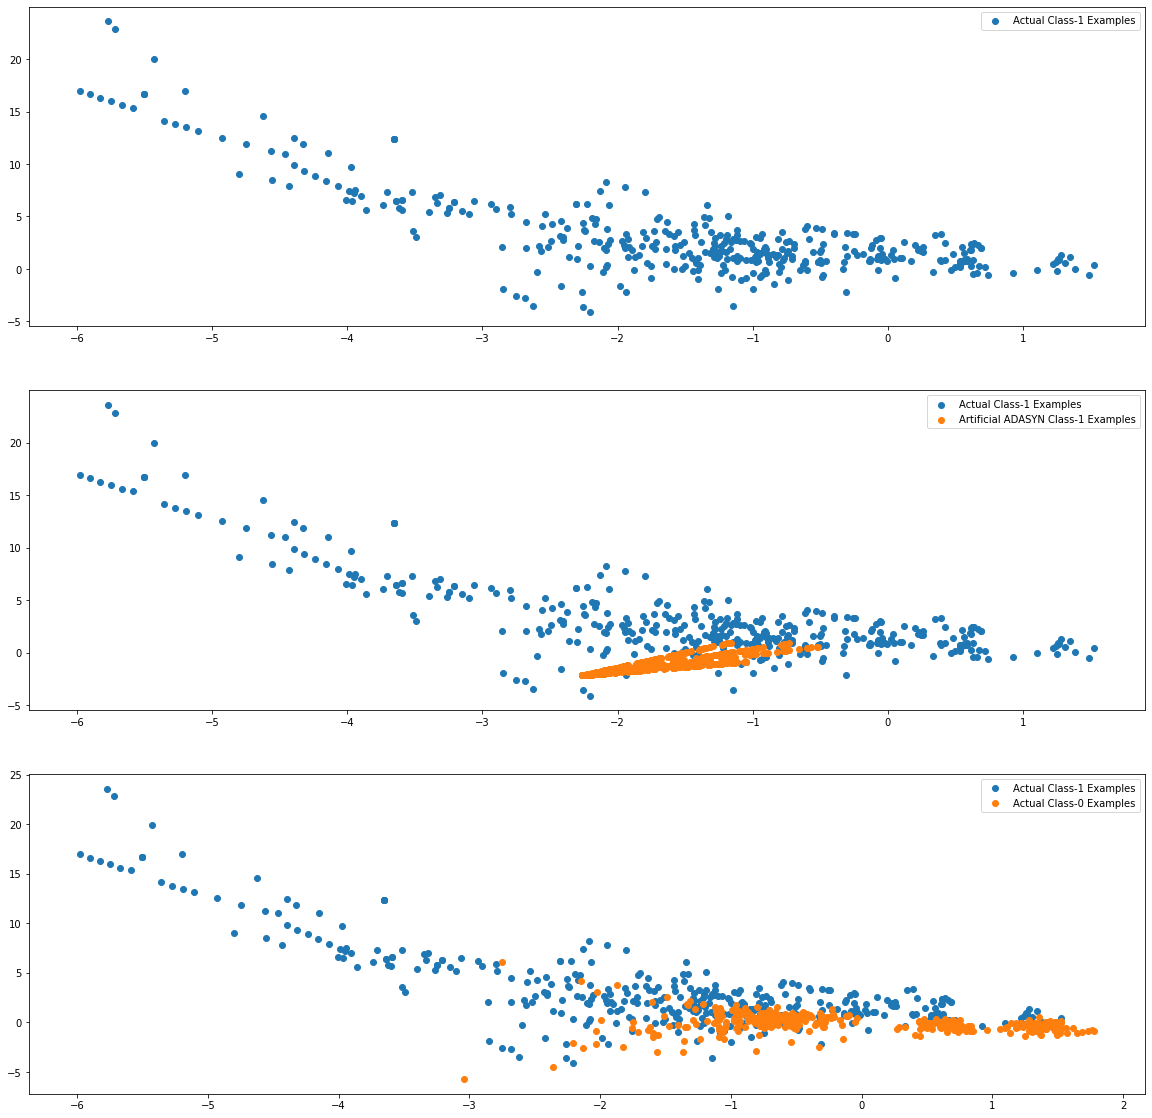

In [140]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

## 4.1 Logistic Regression on SMOTE

In [141]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
logit_adasyn = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
logit_adasyn.fit(X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', logit_adasyn.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.968017067112115


In [142]:
#print the optimum value of hyperparameters
print('Best hyperparameters: ', logit_adasyn.best_params_)

Best hyperparameters:  {'C': 1000}


In [143]:
# cross validation results
cv_results = pd.DataFrame(logit_adasyn.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.169018,0.048778,0.038098,0.000805,0.01,{'C': 0.01},0.967482,0.967342,0.967973,0.968384,...,0.967813,0.000371,6,0.967913,0.967970,0.967755,0.967802,0.967740,0.967836,0.000090
1,1.209296,0.072149,0.038837,0.000870,0.1,{'C': 0.1},0.967679,0.967504,0.968181,0.968524,...,0.968000,0.000366,5,0.968099,0.968155,0.967940,0.967989,0.967930,0.968023,0.000089
2,1.149473,0.084849,0.035050,0.000423,1,{'C': 1},0.967696,0.967516,0.968199,0.968534,...,0.968015,0.000365,4,0.968114,0.968170,0.967956,0.968004,0.967947,0.968038,0.000089
3,1.179937,0.064572,0.036025,0.001956,10,{'C': 10},0.967698,0.967518,0.968201,0.968535,...,0.968017,0.000365,3,0.968116,0.968172,0.967958,0.968005,0.967949,0.968040,0.000089
4,1.171538,0.073985,0.035432,0.001019,100,{'C': 100},0.967698,0.967518,0.968201,0.968535,...,0.968017,0.000365,2,0.968116,0.968172,0.967958,0.968006,0.967949,0.968040,0.000089


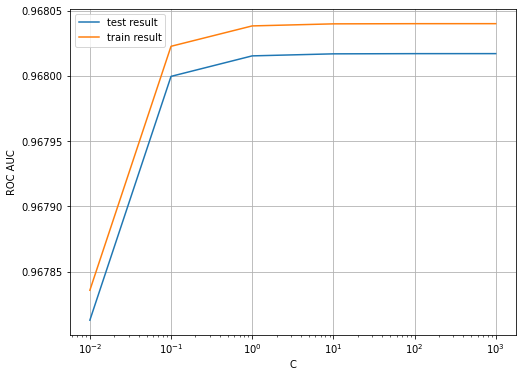

In [144]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('ROC AUC')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')
plt.grid()

In [145]:
logit_adasyn.best_params_

{'C': 1000}

In [146]:
# Instantiating the model
logreg_adasyn_model = logit_adasyn.best_estimator_

# Fitting the model 
logreg_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=1000)

In [147]:
# Evaluating on test data
y_train_pred = logreg_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 90.57%



Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91    227451
           1       0.91      0.90      0.91    227434

    accuracy                           0.91    454885
   macro avg       0.91      0.91      0.91    454885
weighted avg       0.91      0.91      0.91    454885



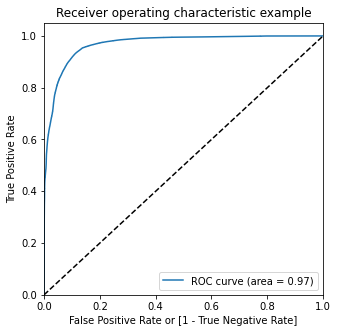

In [148]:
# Predicted probability
y_train_pred_proba = logreg_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [149]:
# Evaluating on test data
y_pred = logreg_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 3.45%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.02      0.93      0.03        98

    accuracy                           0.91     56962
   macro avg       0.51      0.92      0.49     56962
weighted avg       1.00      0.91      0.95     56962



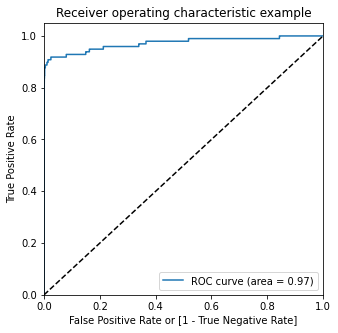

In [150]:
# Predicted probability
y_test_pred_proba = logreg_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

<b>Model Summary<b> 

Train set
- ROC score: 97%
- F1 score:  90.57%

Test set
- ROC score: 97%
- F1 score:  3.45%

## 4.2 Decision Tree on SMOTE

In [151]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [152]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)

Best roc auc score :  0.9431791601030752


In [153]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


In [154]:
# Model with optimal hyperparameters
dt_adasyn_model =grid_search.best_estimator_
dt_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)

In [155]:
# Evaluating model on the test data
y_train_pred = dt_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 97.72%



Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98    227451
           1       0.96      0.99      0.98    227434

    accuracy                           0.98    454885
   macro avg       0.98      0.98      0.98    454885
weighted avg       0.98      0.98      0.98    454885



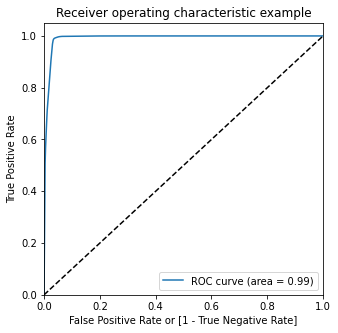

In [156]:
# Predicted probability
y_train_pred_proba = dt_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [157]:
# Evaluating model on the test data
y_pred = dt_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 7.81%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.89      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.96      0.98     56962



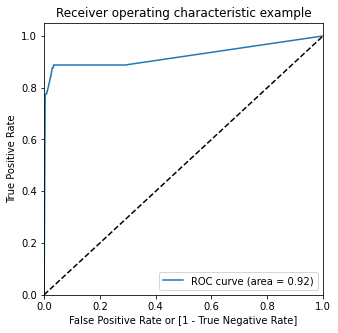

In [158]:
# Predicted probability
y_test_pred_proba = dt_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

<b>Model Summary<b> 

Train set
- ROC score: 99%
- F1 score:  99.72%

Test set
- ROC score: 92%
- F1 score:  7.81%

## 4.3 Random Forest on SMOTE

In [161]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
model = RandomForestClassifier()

rf_adasyn = GridSearchCV(estimator = model, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
rf_adasyn.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [162]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", rf_adasyn.best_score_)

Best roc auc score :  0.9891789944196752


In [163]:
print(rf_adasyn.best_estimator_)

RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [164]:
# Model with optimal hyperparameters
rf_adasyn_model =rf_adasyn.best_estimator_
rf_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)

In [165]:
# Evaluating model on the test data
y_train_pred = rf_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 99.17%



Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227434

    accuracy                           0.99    454885
   macro avg       0.99      0.99      0.99    454885
weighted avg       0.99      0.99      0.99    454885



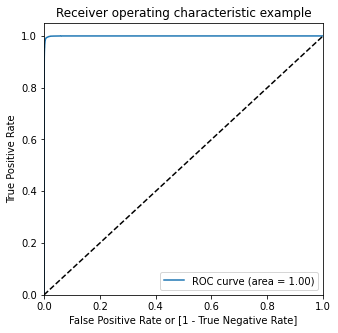

In [166]:
# Predicted probability
y_train_pred_proba = rf_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [167]:
# Evaluating model on the test data
y_pred = rf_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 20.94%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      0.91      0.21        98

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.60     56962
weighted avg       1.00      0.99      0.99     56962



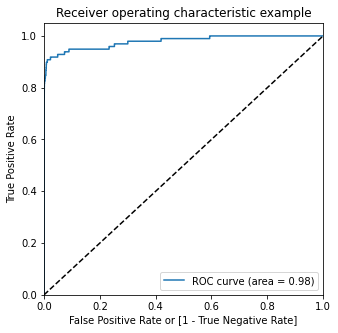

In [168]:
# Predicted probability
y_test_pred_proba = rf_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

<b>Model Summary<b> 

Train set
- ROC score: 100%
- F1 score:  99.17%

Test set
- ROC score: 98%
- F1 score:  19.76%

## 4.4 XG Boost on SMOTE

In [169]:
# creating a KFold object 
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
XG_adasyn = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
XG_adasyn.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[14:57:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=No

In [170]:
# cv results
cv_results = pd.DataFrame(XG_adasyn.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,196.823154,0.307539,0.645075,0.051169,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.969786,0.983921,0.992073,...,0.987958,0.010269,5,0.999275,0.999135,0.998898,0.998995,0.998949,0.999050,0.000137
1,288.254033,4.712172,0.800415,0.083905,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.972678,0.985543,0.992867,...,0.988928,0.009102,4,0.999256,0.998990,0.998990,0.998941,0.998877,0.999011,0.000130
2,359.400680,2.846963,0.777843,0.099591,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.968827,0.984139,0.992953,...,0.987869,0.010574,6,0.999234,0.999092,0.999033,0.998825,0.998919,0.999021,0.000141
3,198.686279,3.250337,0.720751,0.062064,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.982879,0.993901,0.992857,...,0.993579,0.005945,1,0.999908,0.999898,0.999906,0.999893,0.999875,0.999896,0.000012
4,287.806858,3.987505,0.512732,0.124537,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.973365,0.991934,0.993600,...,0.991361,0.009429,3,0.999925,0.999913,0.999933,0.999905,0.999890,0.999913,0.000015


In [171]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", XG_adasyn.best_score_)

Best roc auc score :  0.9935785020280017


In [172]:
print(XG_adasyn.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.3,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [173]:
XG_adasyn.best_params_

{'learning_rate': 0.6, 'subsample': 0.3}

In [174]:
# Model with optimal hyperparameter
xgb_adasyn_model = XG_adasyn.best_estimator_
xgb_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

[14:58:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.3,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [175]:
# Predicting on the train set
y_train_pred = xgb_adasyn_model.predict(X_train_adasyn)
# Printing the scores
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 99.81%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227434

    accuracy                           1.00    454885
   macro avg       1.00      1.00      1.00    454885
weighted avg       1.00      1.00      1.00    454885



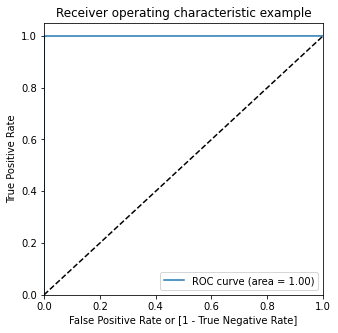

In [176]:
# Predicted probability
y_train_pred_proba = xgb_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [177]:
y_pred = xgb_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 37.91%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.24      0.89      0.38        98

    accuracy                           0.99     56962
   macro avg       0.62      0.94      0.69     56962
weighted avg       1.00      0.99      1.00     56962



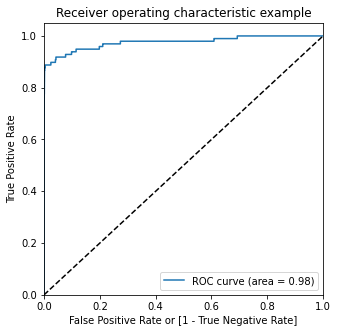

In [178]:
# Predicted probability
y_test_pred_proba = xgb_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

<b>Model Summary<b> 

Train set
- ROC score: 100%
- F1 score: 99.81%

Test set
- ROC score: 98%
- F1 score: 37.91%

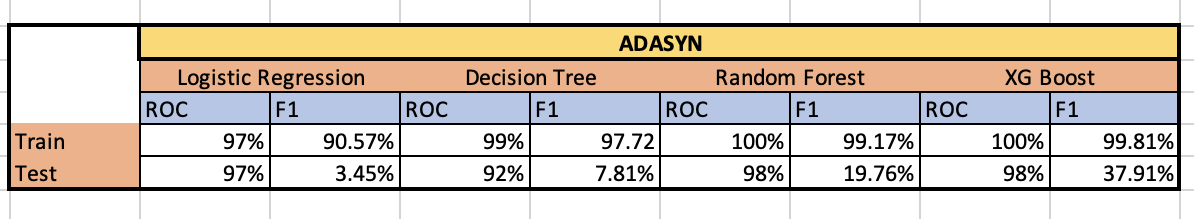

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 10


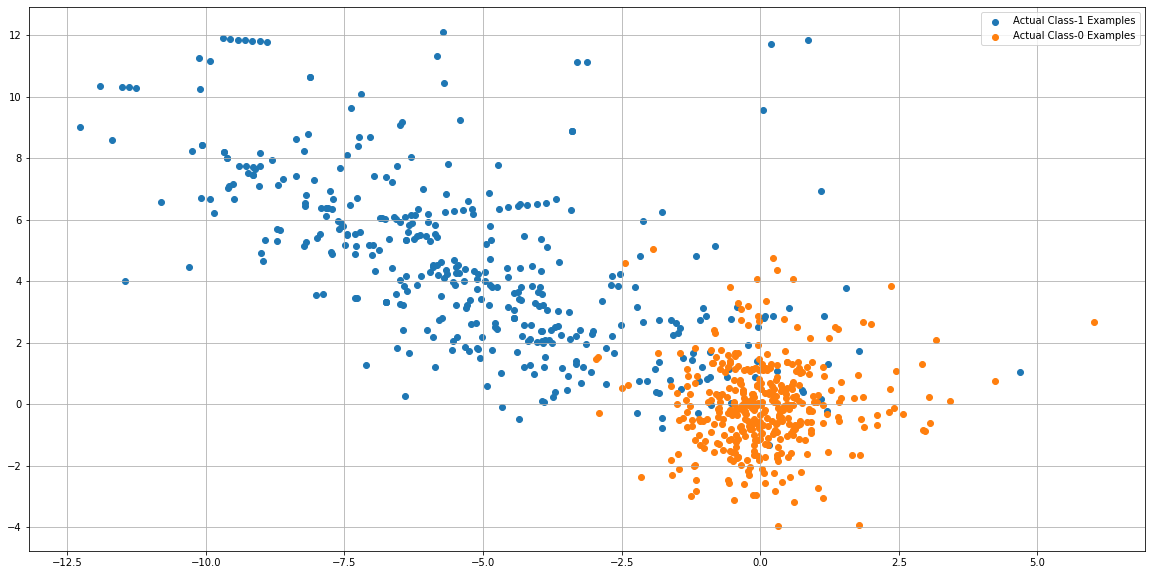

In [179]:
var_imp = []
for i in xgb_smote_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_smote_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_smote_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_smote_model.feature_importances_)[-3])+1)

# Variable on Index-14 and Index-4 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_smote_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_smote_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.grid()

In [180]:
#### Print the FPR,TPR & select the best threshold from the roc curve
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba_xgb))

Train auc = 0.9999692392467163


In [181]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba_xgb )
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

0.61934096
